In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pycaret
from pycaret.classification import *
from pycaret.datasets import get_data

In [2]:
data = pd.read_csv('train.csv')
data = data.drop(columns=['Date', 'Time'])

In [3]:
from pycaret.regression import *
clf1 = setup(data, target='PM25', session_id = 123)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1143, 10)"
4,Transformed data shape,"(1143, 10)"
5,Transformed train set shape,"(800, 10)"
6,Transformed test set shape,"(343, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.1942,10.8781,3.2716,0.7783,0.1744,0.1371,0.1430
gbr,Gradient Boosting Regressor,2.2173,10.9432,3.2761,0.7748,0.1767,0.1404,0.0140
et,Extra Trees Regressor,2.1979,11.1987,3.3165,0.7691,0.1744,0.1376,0.0290
rf,Random Forest Regressor,2.1920,11.2146,3.3056,0.7681,0.1746,0.1379,0.0420
br,Bayesian Ridge,2.5335,13.8667,3.6875,0.7134,0.2015,0.1644,0.0050
ridge,Ridge Regression,2.5453,13.8740,3.6898,0.7131,0.2017,0.1652,0.0040
lr,Linear Regression,2.5498,13.8768,3.6905,0.7130,0.2018,0.1655,0.2610
lar,Least Angle Regression,2.5454,13.8792,3.6905,0.7129,0.2017,0.1652,0.0050
en,Elastic Net,2.6398,14.5880,3.7827,0.6989,0.2096,0.1710,0.0040
lasso,Lasso Regression,2.7334,15.3463,3.8796,0.6831,0.2082,0.1766,0.1570


In [6]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1816,12.3788,3.5183,0.7688,0.1740,0.1263
1,2.2682,12.0430,3.4703,0.7627,0.1719,0.1302
2,2.4538,13.2263,3.6368,0.7727,0.1705,0.1360
3,1.9535,7.1261,2.6695,0.8605,0.1531,0.1250
4,1.8702,7.6881,2.7727,0.7864,0.1684,0.1279
5,2.6304,17.0523,4.1294,0.5336,0.2360,0.2026
6,2.2517,13.6517,3.6948,0.7501,0.1811,0.1366
7,1.9509,7.6722,2.7699,0.8314,0.1505,0.1196
8,2.2071,10.5660,3.2505,0.7947,0.1691,0.1360


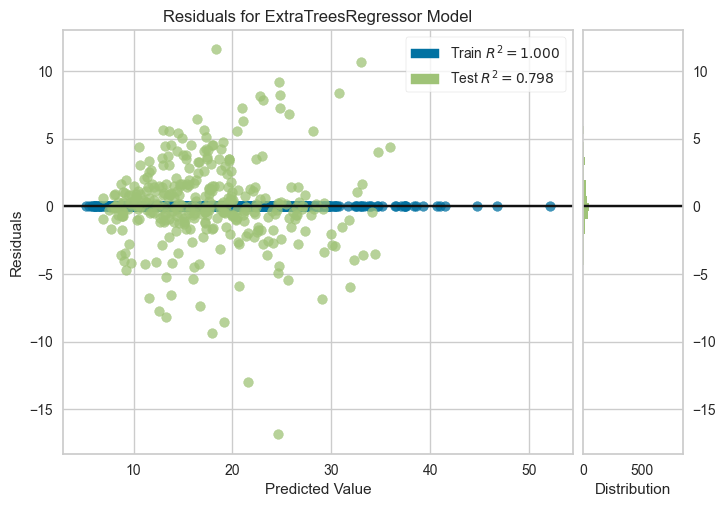

In [21]:
et = create_model('et')
plot_model(et, plot='residuals')

In [25]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.2843,4.1868,2.0462,0.9168,0.1119,0.0805


,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD,PM25,prediction_label
0,20.0,23.0,0.20,1.0,0.0,2,28.0,86,15,11.500000,10.745797
1,21.0,17.0,0.26,1.0,1.0,3,28.0,84,18,10.700000,11.066537
2,24.0,17.0,0.26,1.0,1.0,3,28.0,83,20,11.700000,12.072654
3,27.0,18.0,0.27,1.0,1.0,4,28.0,82,31,13.200000,13.342462
4,32.0,19.0,0.26,1.0,1.0,3,29.0,80,29,16.299999,20.457411


In [26]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PM10', 'O3', 'CO', 'NO2', 'SO2',
                                              'WS', 'TEMP', 'RH', 'WD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'my_best_pipeline.pkl')

In [27]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['PM10', 'O3', 'CO', 'NO2', 'SO2',
                                             'WS', 'TEMP', 'RH', 'WD'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))])


In [33]:
test = pd.read_csv('test.csv')
test = test.drop(columns=['Date', 'Time'])
predict_model(et,data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,3.9076,21.6671,4.6548,-0.0010,0.3843,0.4431


,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD,PM25,prediction_label
0,48.0,16.0,0.05,1.0,0.0,3,27.0,79,44,11.300000,16.3690
1,36.0,23.0,0.13,1.0,0.0,5,32.0,54,60,12.200000,15.8550
2,51.0,19.0,0.11,1.0,0.0,3,26.0,79,35,19.700001,15.6710
3,51.0,19.0,0.05,1.0,0.0,3,26.0,79,27,15.300000,14.4280
4,59.0,18.0,0.05,1.0,0.0,3,26.0,80,16,17.900000,20.6440
...,...,...,...,...,...,...,...,...,...,...,...
281,43.0,10.0,0.07,3.0,0.0,1,25.0,88,307,16.400000,21.6210
282,36.0,3.0,0.13,5.0,0.0,1,24.0,92,283,20.400000,16.6070
283,32.0,1.0,0.17,6.0,0.0,0,24.0,94,275,15.200000,17.6274
284,33.0,0.0,0.20,7.0,0.0,1,24.0,93,319,13.700000,15.6246


In [34]:
tuned_et = tune_model(et)
bagged = ensemble_model(et , n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.4772,14.8757,3.8569,0.7221,0.1837,0.1413
1,2.6475,14.7468,3.8402,0.7094,0.1870,0.1522
2,2.8002,17.5371,4.1877,0.6986,0.1927,0.1557
3,2.2350,8.7583,2.9594,0.8285,0.1844,0.1562
4,2.0512,8.7104,2.9513,0.7580,0.1784,0.1388
5,2.7538,17.4843,4.1814,0.5218,0.2482,0.2189
6,2.3825,14.4401,3.8000,0.7357,0.1883,0.1481
7,2.2089,8.7076,2.9509,0.8087,0.1781,0.1511
8,2.5534,12.4013,3.5215,0.7590,0.1878,0.1617


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2055,11.6689,3.4160,0.7820,0.1707,0.1287
1,2.2290,11.9313,3.4542,0.7649,0.1703,0.1284
2,2.4871,13.0766,3.6162,0.7752,0.1719,0.1386
3,1.9422,7.0555,2.6562,0.8619,0.1554,0.1269
4,1.8260,7.5352,2.7450,0.7907,0.1673,0.1250
5,2.6271,17.1627,4.1428,0.5306,0.2363,0.2036
6,2.1878,12.9738,3.6019,0.7625,0.1769,0.1324
7,1.8770,6.8618,2.6195,0.8492,0.1464,0.1164
8,2.2068,10.3136,3.2115,0.7996,0.1683,0.1369


In [35]:
predict_model(bagged,data=test)

,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD,PM25,prediction_label
0,48.0,16.0,0.05,1.0,0.0,3,27.0,79,44,11.300000,16.745460
1,36.0,23.0,0.13,1.0,0.0,5,32.0,54,60,12.200000,15.710360
2,51.0,19.0,0.11,1.0,0.0,3,26.0,79,35,19.700001,15.474880
3,51.0,19.0,0.05,1.0,0.0,3,26.0,79,27,15.300000,14.782080
4,59.0,18.0,0.05,1.0,0.0,3,26.0,80,16,17.900000,21.747560
...,...,...,...,...,...,...,...,...,...,...,...
281,43.0,10.0,0.07,3.0,0.0,1,25.0,88,307,16.400000,21.591844
282,36.0,3.0,0.13,5.0,0.0,1,24.0,92,283,20.400000,18.134076
283,32.0,1.0,0.17,6.0,0.0,0,24.0,94,275,15.200000,19.126872
284,33.0,0.0,0.20,7.0,0.0,1,24.0,93,319,13.700000,17.160232


In [65]:
from pycaret.regression import *
import datetime

data = pd.read_csv("train.csv")
exp = setup(data, target="PM25", session_id=123)
best_model = compare_models()
trained_model = finalize_model(best_model)
future_week_dates = [datetime.date.today() + datetime.timedelta(days=i) for i in range(7)]
future_data = pd.DataFrame({"Date": future_week_dates})

test = pd.read_csv("test.csv")


predictions_df = predict_model(trained_model, data=test)


,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1143, 12)"
4,Transformed data shape,"(1143, 35)"
5,Transformed train set shape,"(800, 35)"
6,Transformed test set shape,"(343, 35)"
7,Numeric features,9
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.9338,8.3864,2.8632,0.8282,0.1557,0.1218,0.0420
rf,Random Forest Regressor,1.9441,8.5797,2.8901,0.8255,0.1569,0.1223,0.0560
gbr,Gradient Boosting Regressor,1.9920,8.8378,2.9415,0.8189,0.1601,0.1260,0.0240
ridge,Ridge Regression,2.4525,11.8949,3.4164,0.7562,0.1987,0.1591,0.0120
lr,Linear Regression,2.4624,11.9214,3.4213,0.7557,0.2003,0.1598,0.0140
br,Bayesian Ridge,2.4496,11.9214,3.4178,0.7554,0.1945,0.1582,0.0100
en,Elastic Net,2.5143,12.9960,3.5659,0.7322,0.1953,0.1607,0.0140
ada,AdaBoost Regressor,2.7675,13.1723,3.6101,0.7291,0.2131,0.1937,0.0200
llar,Lasso Least Angle Regression,2.5655,13.4756,3.6299,0.7222,0.1956,0.1638,0.0110
lasso,Lasso Regression,2.5655,13.4755,3.6299,0.7222,0.1956,0.1638,0.0130


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.2234,26.1696,5.1156,-0.2091,0.3940,0.4656


In [67]:
predictions_df["Predicted"] = predictions_df.iloc[:, 0]
pm25_predictions = predictions_df["prediction_label"].tolist()

In [69]:

print(f"PM2.5 predictions for the next week:")
for date, prediction in zip(future_week_dates, pm25_predictions):
  print(f"{date.strftime('%Y-%m-%d')}: {prediction:.2f}")

PM2.5 predictions for the next week:
2024-03-04: 15.58
2024-03-05: 17.57
2024-03-06: 15.93
2024-03-07: 14.41
2024-03-08: 16.18
2024-03-09: 17.52
2024-03-10: 17.34
